In [19]:
import netCDF4 as nc
import pylab as plt
import numpy as np
from mpl_toolkits.basemap import Basemap, shiftgrid
import cf
import cfplot as cfp
import matplotlib

## Import data

In [3]:
data = nc.Dataset('/shared/netscratch/ptg21/UM_data/xltln/xltln_ch4.nc')
#extract variables to arrays
ch4 = data.variables['ch4'][:]*28/16.*1e9
lat = data.variables['latitude'][:]
lon = data.variables['longitude'][:]
box_no = data.variables['model_level_number'][:]
alt = data.variables['level_height'][:]

#ch4, lon = shiftgrid(180.,ch4,lon,start=False)

In [4]:
data_lbc = nc.Dataset('/shared/netscratch/ptg21/UM_data/xgywn/xgywn_pm7-9.nc')
#extract variables to arrays
ch4_lbc = data_lbc.variables['field34009'][:]*28/16.*1e9
lat_lbc = data_lbc.variables['latitude'][:]
lon_lbc = data_lbc.variables['longitude'][:]
#box_no_lbc = data_lbc.variables['model_level_number'][:]
alt_lbc = data_lbc.variables['hybrid_ht'][:]

#ch4_lbc, lon_lbc = shiftgrid(180.,ch4_lbc,lon_lbc,start=False)

## Mean over lon and time

In [5]:
ch4_mean = np.mean(ch4, axis=(0,3))
ch4_mean_lbc = np.mean(ch4_lbc, axis=(0,3)) #mean over lon and time

## Latitude band data

In [6]:
lat_bands_ch4 = np.empty((6,60))
base_em = np.zeros(6)

for i in range(-90,90,30):
    ind1 = list(lat).index(i)
    ind2 = list(lat).index(i+30)
    lat_data = ch4_mean[:,ind1:ind2]
    lat_mean = np.mean(lat_data, axis=1)
    ind3 = np.int((i+90)/30)
    base_em[ind3] = lat_mean[0]
    lat_bands_ch4[ind3,:] = lat_mean

print(lat_bands_ch4.shape)

(6, 60)


In [7]:
lat_bands_ch4_lbc = np.empty((6,60))
base_lbc = np.zeros(6)

for i in range(-90,90,30):
    ind1 = list(lat_lbc).index(i)
    ind2 = list(lat_lbc).index(i+30)
    lat_data = ch4_mean_lbc[:,ind1:ind2]
    lat_mean = np.mean(lat_data, axis=1)
    ind3=np.int((i+90)/30)
    base_lbc[ind3] = lat_mean[0]
    lat_bands_ch4_lbc[ind3,:] = lat_mean

In [30]:
lat_bands_ch4_obs = np.load('/shared/netscratch/znjs2/atom_data_02_20/ch4_lat_binned.npy')
yvals = np.linspace(0,12000)
base_obs = lat_bands_ch4_obs[0,0]

Plot vertical profile for CH4 data with latitude bands meaned

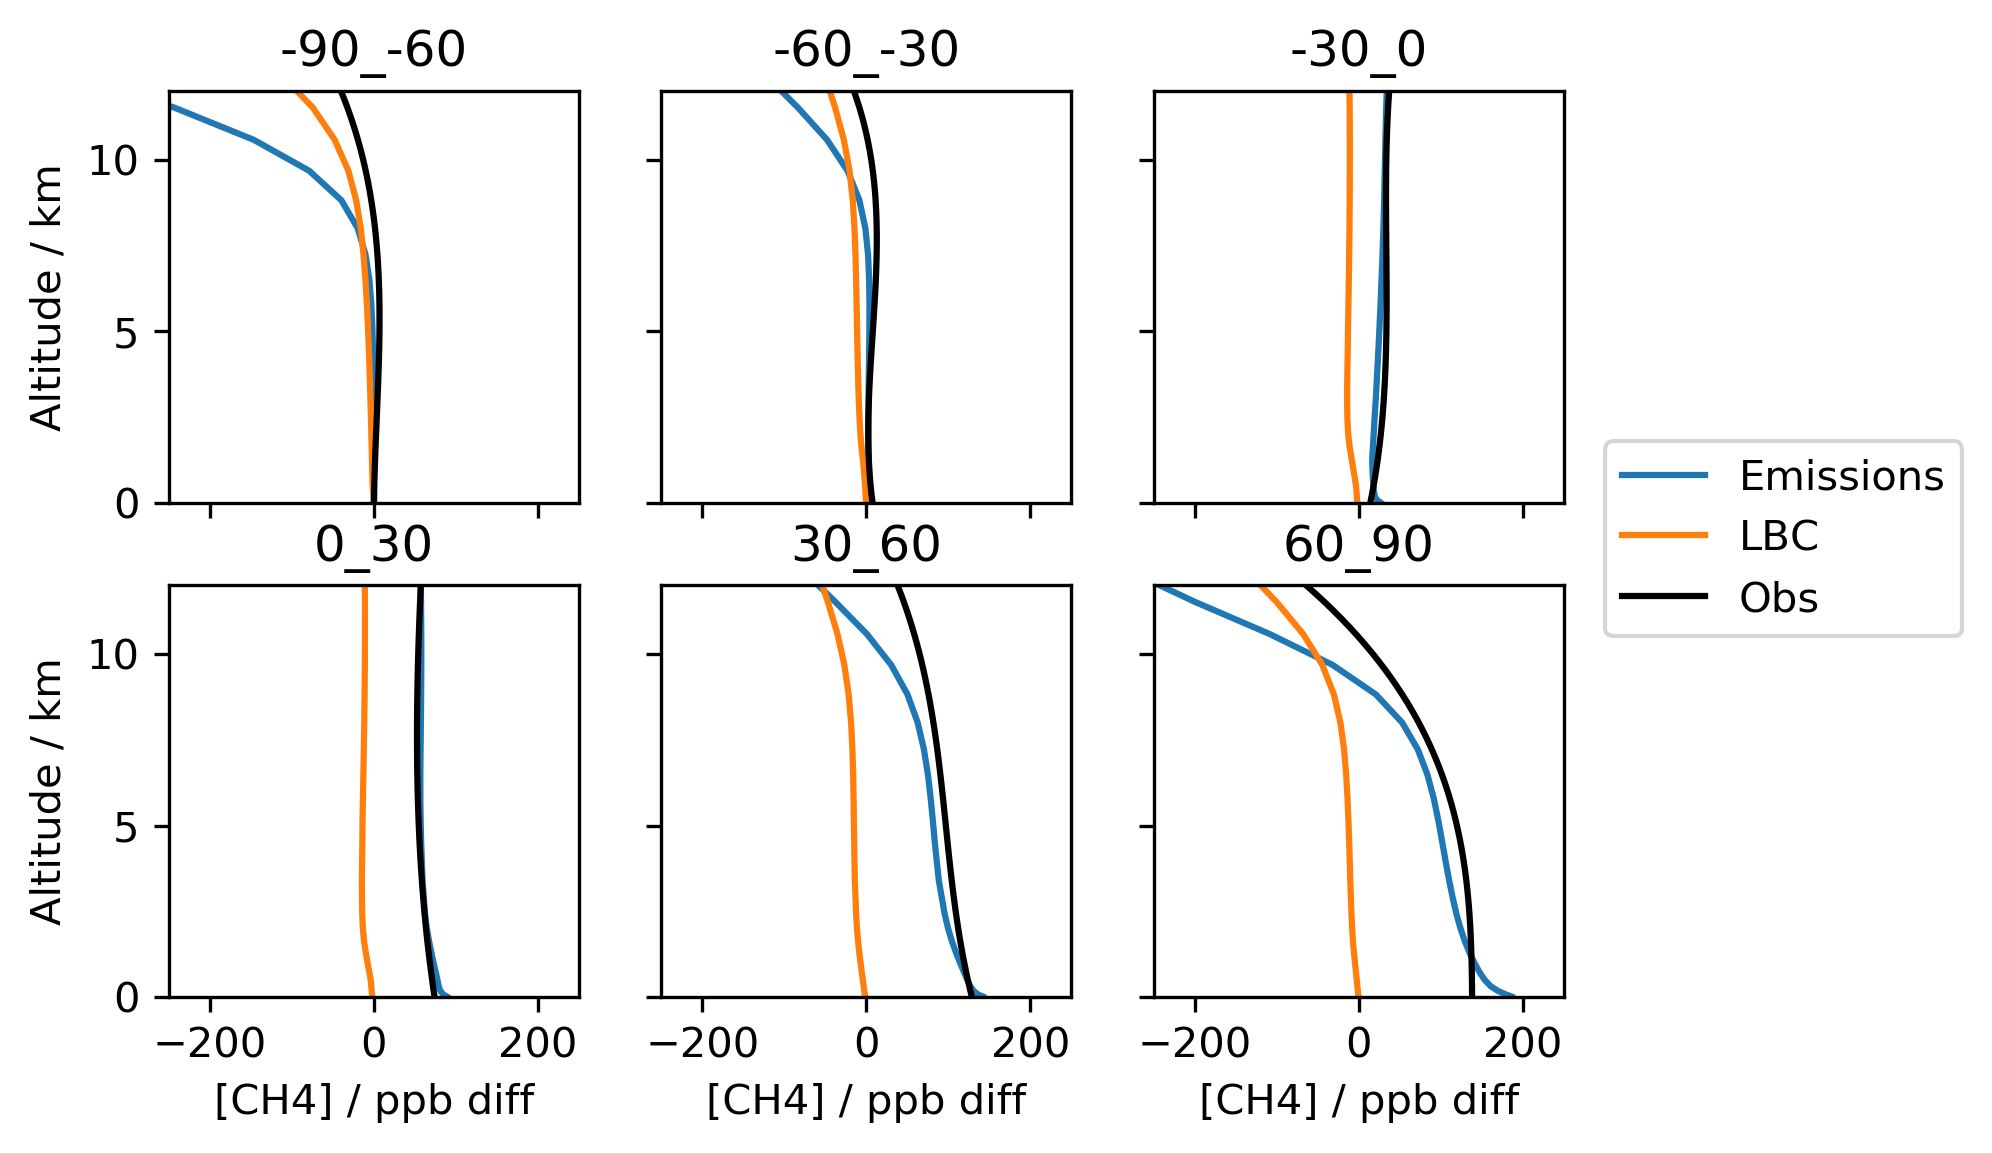

In [49]:
fig = plt.figure(dpi=300)
#ax = plt.axes()

plt_labels=["-90_-60","-60_-30","-30_0","0_30","30_60","60_90"]

for i in range(6):
    ax = plt.subplot(2,3,i+1)
    ax.plot(lat_bands_ch4[i,:] - base_em[0], alt/1000, label=f'Emissions')
    ax.plot(lat_bands_ch4_lbc[i,:] - base_lbc[0], alt_lbc/1000, label=f'LBC')
    ax.plot(lat_bands_ch4_obs[i,:] - base_obs, yvals/1000, c ='k' ,label=f'Obs')
    ax.set_ylim(0,12)
    ax.set_xlim(-250,250)
    plt.xlabel('[CH4] / ppb diff')
    plt.ylabel('Altitude / km')
    plt.title(f'{plt_labels[i]}')
    if i == 5:
        plt.legend(bbox_to_anchor=(1.05,1.4))

for ax in fig.get_axes():
    ax.label_outer()

#for legend for all lines in all subplots
#fig.legend(bbox_to_anchor=(1.1,1))